In [5]:
import numpy as np
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import glob, os

plot_colors = ['b', 'g', 'r', 'm', 'c', 'y', 'k']

writers_dic = {}
client_band_dic = {}
client_utils_dic = {}
osds_utils_dic = {}
for operation in ["read", "write"]:
    writers_dic[operation] = {}
    client_band_dic[operation] = {}
    client_utils_dic[operation] = {}
    osds_utils_dic[operation] = {}
    for file in glob.glob("output_"+ operation +"_*.csv"):
        data = read_csv(file)
        datalen = len(data.values)
        client_band = []
        writers = []
        client_utils = []
        obj_size = data.values[0,0]
        row_len = len(data.values[0])
        osds_utils=[[] for _ in range(row_len-4)]
        for i in range(datalen):
            writers.append(data.values[i,1])
            client_utils.append(data.values[i,2])
            client_band.append(data.values[i,3])
            for j in range(4, row_len):
                osds_utils[j-4].append(data.values[i,j])

        client_band_dic[operation][int(obj_size)] = client_band
        client_utils_dic[operation][int(obj_size)] = client_utils
        osds_utils_dic[operation][int(obj_size)] = osds_utils

        writers_dic[operation][int(obj_size)] = [str(int(i)) for i in writers]


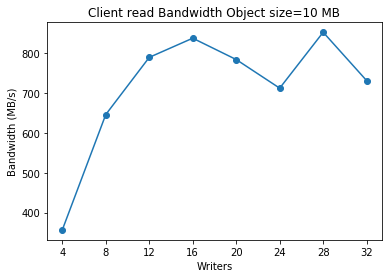

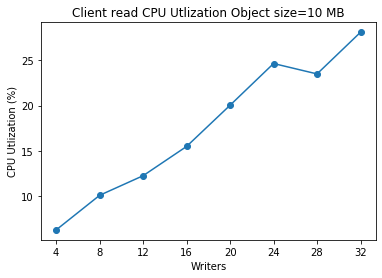

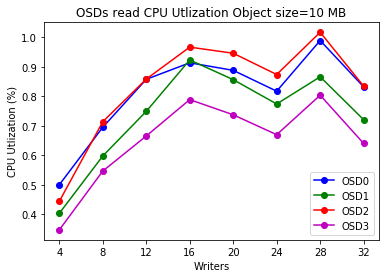

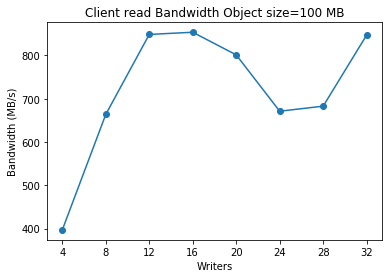

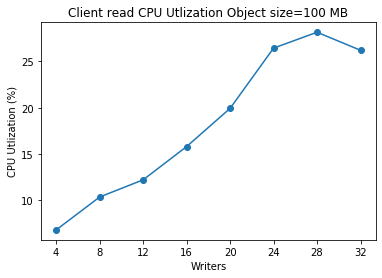

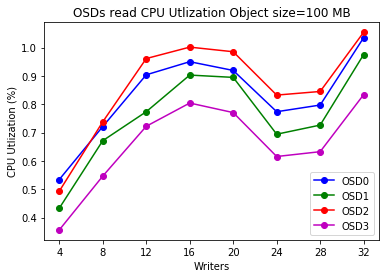

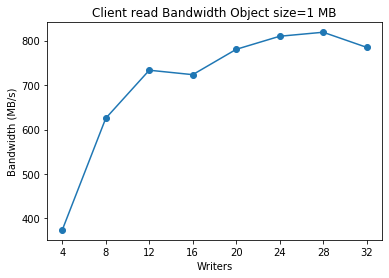

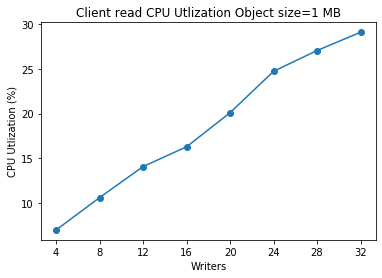

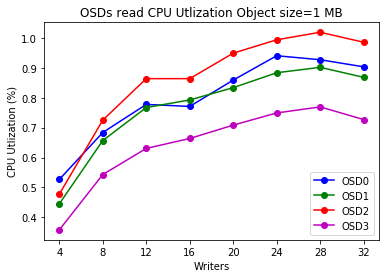

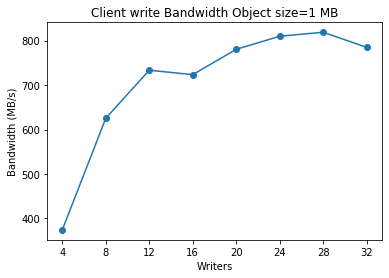

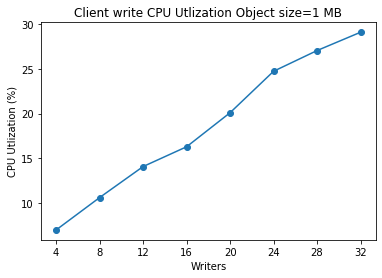

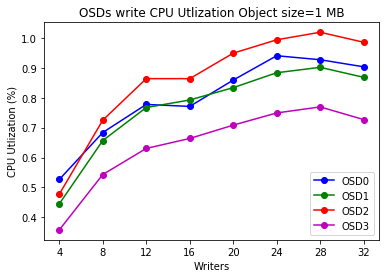

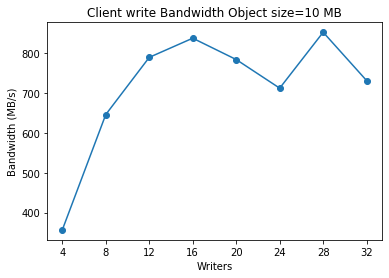

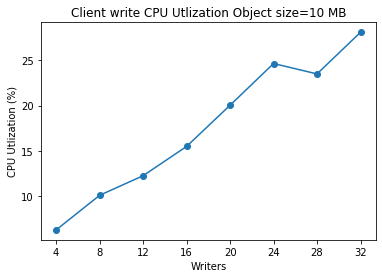

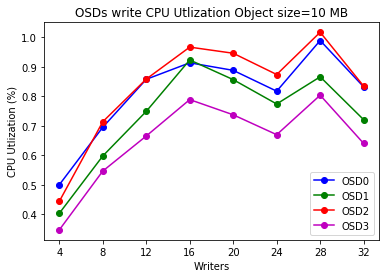

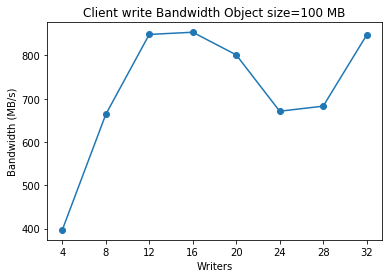

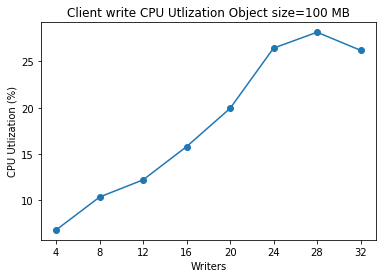

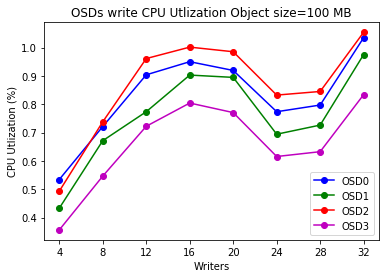

In [9]:
for operation in ["read", "write"]:
    for obj_size in client_band_dic[operation]:
        plt.plot(writers_dic[operation][obj_size], client_band_dic[operation][obj_size], marker='o')
        plt.title('Client ' + operation + ' Bandwidth Object size='+str(obj_size)+' MB')
        plt.xlabel('Writers')
        plt.ylabel('Bandwidth (MB/s)')
        plt.show()

        plt.plot(writers_dic[operation][obj_size], client_utils_dic[operation][obj_size], marker='o')
        plt.title('Client ' + operation + ' CPU Utlization Object size='+str(obj_size)+' MB')
        plt.xlabel('Writers')
        plt.ylabel('CPU Utlization (%)')
        plt.show()
        i = 0
        for osds_utils in osds_utils_dic[operation][obj_size]:
            plt.plot(writers_dic[operation][obj_size], osds_utils, marker='o', color=plot_colors[i], label='OSD'+str(i))
            i += 1
            plt.title('OSDs ' + operation + ' CPU Utlization Object size='+str(obj_size)+' MB')
            plt.xlabel('Writers')
            plt.ylabel('CPU Utlization (%)')
            plt.legend(loc='lower right')
        plt.show()

# All in one

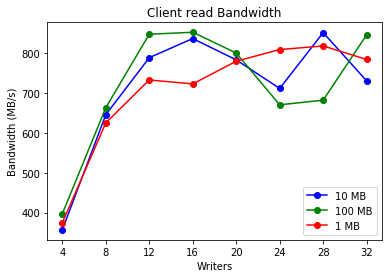

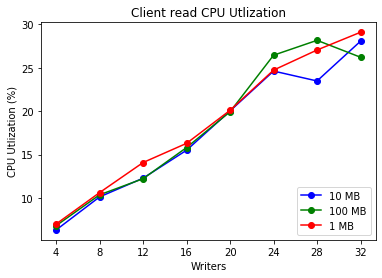

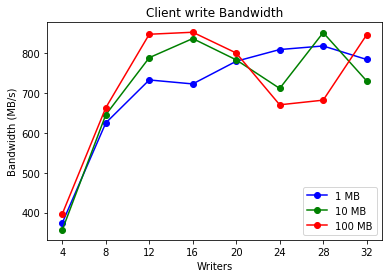

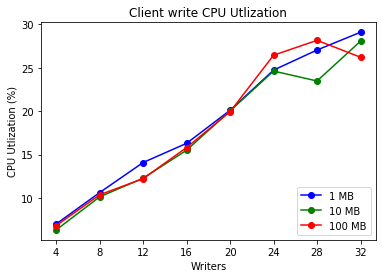

In [10]:
for operation in ["read", "write"]:   
    i = 0
    for obj_size in client_band_dic[operation]:
        plt.plot(writers_dic[operation][obj_size], client_band_dic[operation][obj_size], marker='o', color=plot_colors[i], label=str(obj_size)+' MB')
        plt.title('Client ' + operation + ' Bandwidth')
        plt.xlabel('Writers')
        plt.ylabel('Bandwidth (MB/s)')
        plt.legend(loc='lower right')
        i += 1
    plt.show()
    i = 0
    for obj_size in client_band_dic[operation]:    
        plt.plot(writers_dic[operation][obj_size], client_utils_dic[operation][obj_size], marker='o', color=plot_colors[i], label=str(obj_size)+' MB')
        plt.title('Client ' + operation + ' CPU Utlization')
        plt.xlabel('Writers')
        plt.ylabel('CPU Utlization (%)')
        plt.legend(loc='lower right')
        i += 1
    plt.show()